In [1]:
import pandas as pd
import numpy as npdf
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dp = pd.read_csv(r'C:\Users\USER\Downloads\employee_survey.csv', sep =',')
dp

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


In [34]:
dp.shape

(3025, 23)

In [35]:
total = dp.isnull().sum().sort_values(ascending= False)
total

EmpID                    0
Stress                   0
TrainingHoursPerYear     0
haveOT                   0
EduLevel                 0
NumReports               0
TeamSize                 0
NumCompanies             0
CommuteDistance          0
CommuteMode              0
SleepHours               0
Workload                 0
Gender                   0
PhysicalActivityHours    0
WorkEnv                  0
WLB                      0
EmpType                  0
Dept                     0
Experience               0
JobLevel                 0
MaritalStatus            0
Age                      0
JobSatisfaction          0
dtype: int64

In [37]:
df = dp[['WLB', 'JobSatisfaction', 'Stress', 'WorkEnv']]

# Memeriksa data untuk memastikan tidak ada nilai NaN
print(df.isnull().sum())

WLB                0
JobSatisfaction    0
Stress             0
WorkEnv            0
dtype: int64


In [38]:
# Mendefinisikan variabel independen dan dependen
import statsmodels.api as sm
X = df[['WLB', 'Stress', 'WorkEnv']]
y = df['JobSatisfaction']

# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

# Membuat model regresi linier
model = sm.OLS(y, X).fit()

# Melihat hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.89e-124
Time:                        13:04:55   Log-Likelihood:                -4704.2
No. Observations:                3025   AIC:                             9416.
Df Residuals:                    3021   BIC:                             9440.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4727      0.074     33.227      0.0

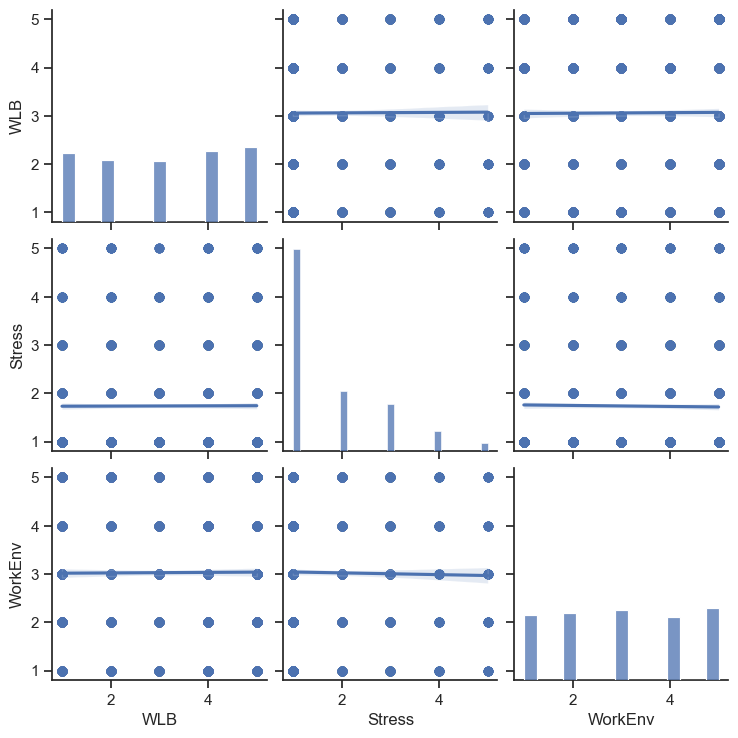

In [39]:
# pair plot with plot type regression
sns.pairplot(df,vars = ['WLB', 'Stress','WorkEnv'], kind="reg")
plt.show()

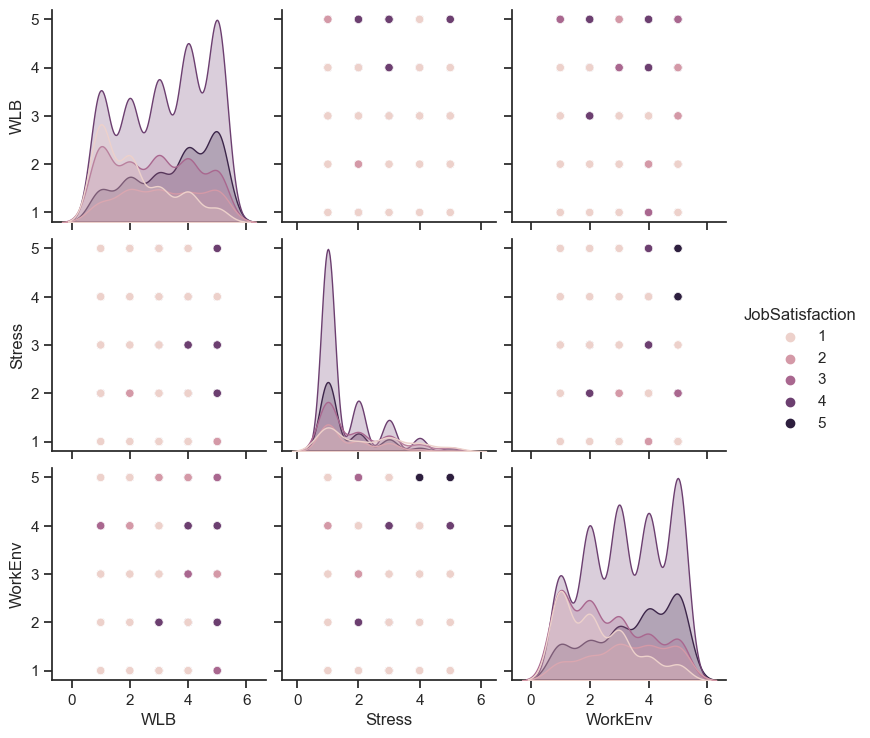

In [40]:
 #pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['WLB', 'Stress','WorkEnv'], hue="JobSatisfaction")
plt.show()

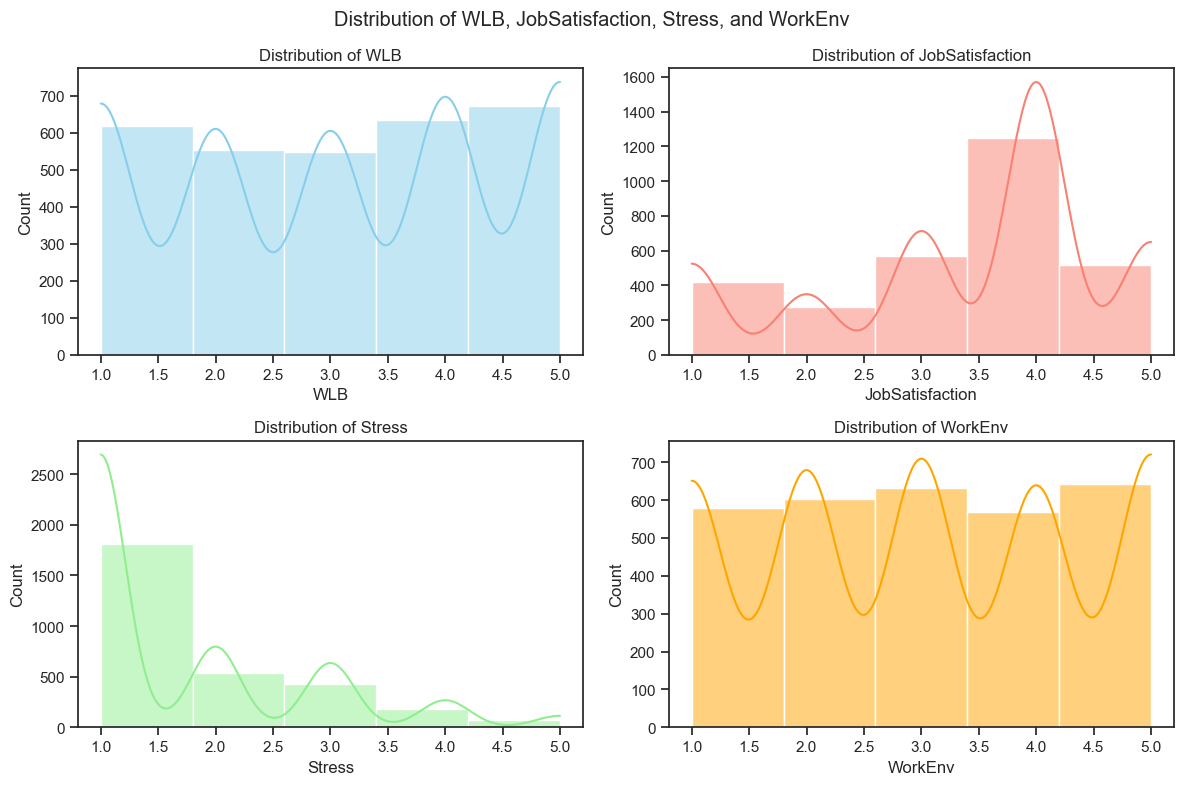

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of WLB, JobSatisfaction, Stress, and WorkEnv")

# Plot untuk WLB
sns.histplot(df['WLB'], bins=5, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of WLB")

# Plot untuk JobSatisfaction
sns.histplot(df['JobSatisfaction'], bins=5, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribution of JobSatisfaction")

# Plot untuk Stress
sns.histplot(df['Stress'], bins=5, kde=True, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Distribution of Stress")

# Plot untuk WorkEnv
sns.histplot(df['WorkEnv'], bins=5, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of WorkEnv")

plt.tight_layout()
plt.show()


In [42]:
from scipy import stats

# Menghitung korelasi Pearson untuk masing-masing variabel terhadap JobSatisfaction
variables = ['WLB', 'Stress', 'WorkEnv']
for var in variables:
    corr = stats.pearsonr(df[var], df['JobSatisfaction'])
    print(f"Korelasi antara {var} dan JobSatisfaction:")
    print("p-value:\t", corr[1])
    print("cor:\t\t", corr[0])
    print()


Korelasi antara WLB dan JobSatisfaction:
p-value:	 8.194092905974926e-48
cor:		 0.2596872800125278

Korelasi antara Stress dan JobSatisfaction:
p-value:	 8.759834103275332e-33
cor:		 -0.21438269956302416

Korelasi antara WorkEnv dan JobSatisfaction:
p-value:	 6.945939004062785e-44
cor:		 0.2487300192722577



In [43]:
correlation = df.corr(method='pearson')
correlation

,WLB,JobSatisfaction,Stress,WorkEnv
WLB,1.000000,0.259687,0.003595,0.005751
JobSatisfaction,0.259687,1.000000,-0.214383,0.248730
Stress,0.003595,-0.214383,1.000000,-0.013791
WorkEnv,0.005751,0.248730,-0.013791,1.000000


<Axes: >

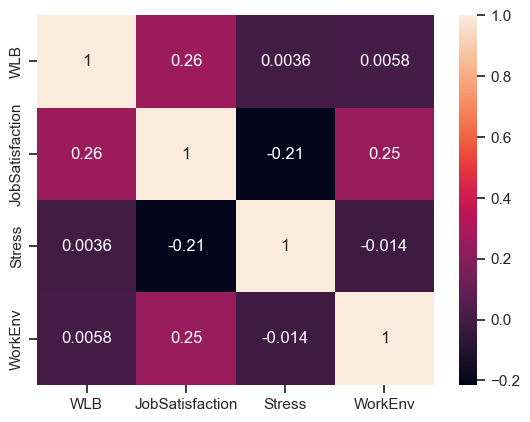

In [44]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

              lval  op             rval  Estimate  Std. Err    z-value  \
0              WLB   ~         Workload  0.000000  0.013276   0.000000   
1              WLB   ~       SleepHours  0.000000  0.018556   0.000000   
2  JobSatisfaction   ~              WLB  0.000000  0.015840   0.000000   
3  JobSatisfaction   ~         Workload  0.000000  0.011564   0.000000   
4              WLB  ~~              WLB  1.046560  0.026910  38.890873   
5  JobSatisfaction  ~~  JobSatisfaction  0.794293  0.020424  38.890873   

   p-value  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      0.0  
5      0.0  


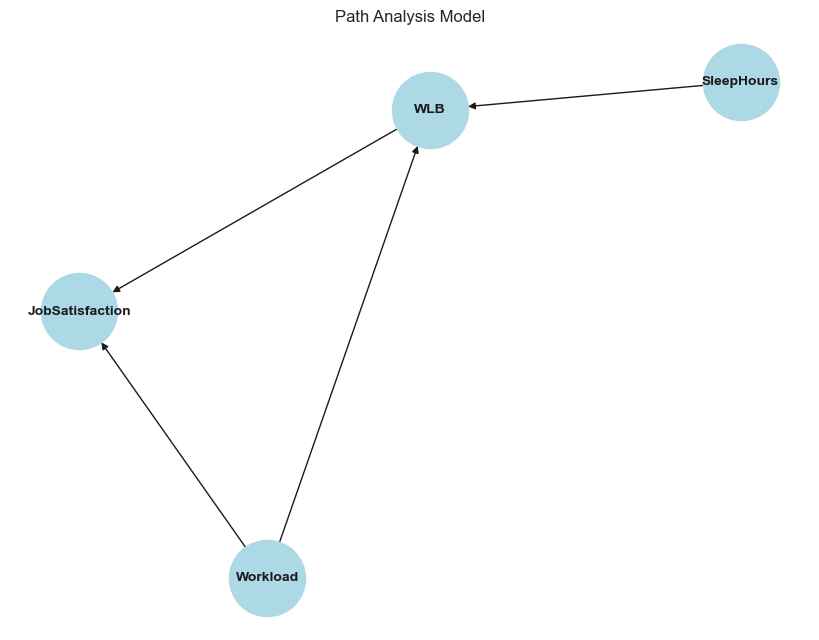

In [49]:
import pandas as pd
from semopy import Model, Optimizer
import matplotlib.pyplot as plt
import networkx as nx

# Memilih kolom yang relevan untuk analisis jalur
df = df[['Workload', 'SleepHours', 'WLB', 'JobSatisfaction']]

# Definisikan model jalur (path model)
model_desc = """
WLB ~ Workload + SleepHours
JobSatisfaction ~ WLB + Workload
"""

# Membuat model
model = Model(model_desc)

# Load the dataset into the model
model.load_dataset(df)

# Membuat dan menyesuaikan model
opt = Optimizer(model)
opt.optimize()

# Menampilkan hasil estimasi
# Use the model's `inspect` method to get parameter estimates
results = model.inspect()
print(results)

# Visualisasi model jalur menggunakan NetworkX
edges = [("Workload", "WLB"), ("SleepHours", "WLB"), ("WLB", "JobSatisfaction"), ("Workload", "JobSatisfaction")]
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Path Analysis Model")
plt.show()